### SVM_Classification_(Linear)

Step 1: Data Load လုပ်ခြင်းနှင့် Feature များ သီးခြားခွဲထုတ်ခြင်း (Data Loading & Feature Selection)
-   Machine Learning Model မတည်ဆောက်မီ လိုအပ်တဲ့ Dataset ကို ဖတ်ယူပြီး၊ ခန့်မှန်းတွက်ချက်မယ့် အချက်အလက် (Features) နဲ့ အဖြေ (Target) ကို သီးခြားစီ ခွဲထုတ်လိုက်ခြင်း ဖြစ်ပါတယ်။

In [1]:
import pandas as pd

# Data Load လုပ်ခြင်း
df = pd.read_csv(r'C:\Users\MSI\Desktop\Git_Project\AI_2026\Day07 SVM\example\heart_(SVM).csv')
x = df.drop('target', axis=1)
y = df['target']

Step 2: Data ကို အုပ်စုခွဲခြင်း (Train/Test Split)

In [2]:
from sklearn.model_selection import train_test_split

# Train/Test Split လုပ်ခြင်း
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Step 3: အချက်အလက်များကို စံသတ်မှတ်ချက်အတွင်း ညှိယူခြင်း (Feature Scaling)
-   SVM Algorithm သည် Data များ၏ အကွာအဝေး (Distance) ပေါ်မူတည်၍ အလုပ်လုပ်သောကြောင့် ယူနစ်မတူညီသော Data များကို စံနှုန်းတစ်ခုတည်းဖြစ်အောင် ညှိယူပေးခြင်း ဖြစ်ပါတယ်။

In [3]:
from sklearn.preprocessing import StandardScaler

# Feature Scaling (SVM အတွက် မရှိမဖြစ်လိုအပ်ပါတယ်)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 4: Linear SVM Model တည်ဆောက်ခြင်းနှင့် Training ပေးခြင်း (Model Building & Training)
-   Hyperparameter C=2.0: 'C' သည် Regularization parameter ဖြစ်ပါတယ်။ (C တန်ဖိုးကို ကစားကြည့်ပါ။)
-   ဤတန်ဖိုးက Model ကို "မှားယွင်းမှု ဘယ်လောက် လက်ခံမလဲ" ဆိုတာကို ထိန်းချုပ်ပေးပါတယ်။

In [4]:
from sklearn.svm import SVC

# Linear SVM Model တည်ဆောက်ခြင်း
linear_model = SVC(kernel='linear', C=2.0) 
linear_model.fit(X_train, y_train)

SVC(C=2.0, kernel='linear')

Step 5: Model ၏ တိကျမှုကို စစ်ဆေးခြင်း (Model Evaluation)
-   ယခုအဆင့်မှာတော့ Model ကို မမြင်ဖူးသေးတဲ့ Test Data တွေပေးပြီး ခန့်မှန်းခိုင်းမှာဖြစ်ပြီး၊ ထွက်ပေါ်လာတဲ့ အဖြေတွေဟာ တကယ်တမ်း ရှိနေတဲ့ အဖြေမှန်တွေနဲ့ ဘယ်လောက်အထိ ကိုက်ညီမှုရှိလဲဆိုတာကို ရာခိုင်နှုန်းနဲ့ တွက်ချက်စစ်ဆေးမှာ ဖြစ်ပါတယ်။

In [5]:
from sklearn.metrics import accuracy_score

# ရလဒ်ထုတ်ကြည့်ခြင်း
y_pred = linear_model.predict(X_test)
print("--- Linear SVM Result ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%\n")

--- Linear SVM Result ---
Accuracy Score: 81.46%



Step 6: အရေးပါသော အချက်အလက်များကို ရှာဖွေခြင်းနှင့် ပုံဖော်ခြင်း (Feature Importance & Visualization)
-   Linear SVM Model ရဲ့ ဆုံးဖြတ်ချက်အပေါ်မှာ ဘယ် Feature (ဥပမာ - အသက်၊ ရင်ဘတ်အောင့်ခြင်း) တွေက အကျိုးသက်ရောက်မှု အရှိဆုံးလဲဆိုတာကို Coefficients တန်ဖိုးတွေကတစ်ဆင့် တွက်ချက်ကြည့်ခြင်း ဖြစ်ပါတယ်။

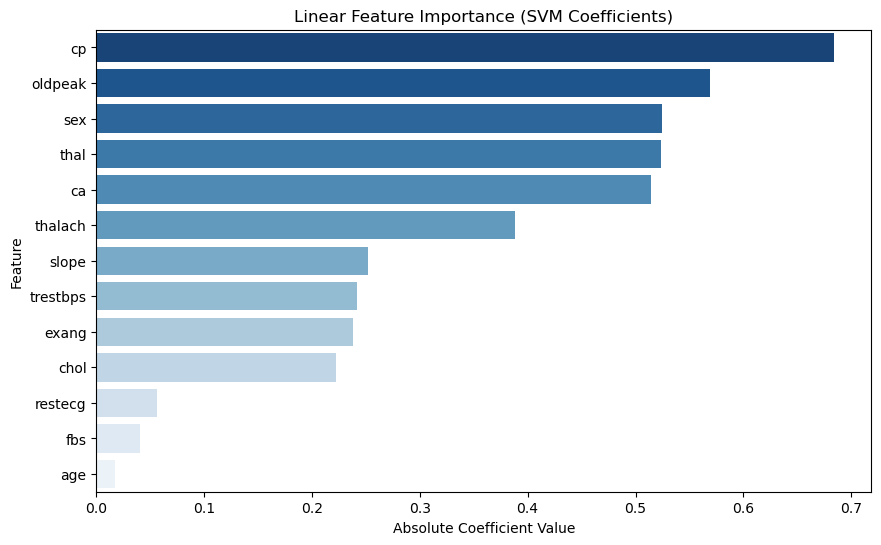

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

linear_importance = np.abs(linear_model.coef_[0])
feat_importance = pd.DataFrame({'Feature': x.columns, 'Importance': linear_importance})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

# Visualization 
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feat_importance, 
    # hue='Feature', 
    palette='Blues_r', 
    # legend=True
)

plt.title('Linear Feature Importance (SVM Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.show()

Step 7: အချက်အလက်များ၏ အရေးပါမှုကို ဇယားဖြင့် အသေးစိတ်ကြည့်ရှုခြင်း (Feature Importance Table)

In [22]:
# ဇယားပုံစံဖြင့် ထုတ်ပြခြင်း
print("--- Feature Importance Table ---")
print(feat_importance)

--- Feature Importance Table ---
     Feature  Importance
2         cp    0.684407
9    oldpeak    0.568778
1        sex    0.524531
12      thal    0.523641
11        ca    0.514516
7    thalach    0.388080
10     slope    0.252077
3   trestbps    0.241453
8      exang    0.238326
4       chol    0.222604
6    restecg    0.056161
5        fbs    0.040400
0        age    0.017410


### Data Visualization for SVM (Linear)

- ယခုအဆင့်မှာတော့ နှလုံးရောဂါ ရှိ၊ မရှိ ခွဲခြားဖို့အတွက် အရေးကြီးတဲ့ Feature နှစ်ခုဖြစ်တဲ့ cp (ရင်ဘတ်အောင့်ခြင်းအမျိုးအစား) နဲ့ oldpeak (လေ့ကျင့်ခန်းလုပ်ချိန်တွင် ဖြစ်ပေါ်သော ST depression) ကို အသုံးပြုပြီး Support Vector Classifier (SVC) ကို train မှာဖြစ်ပါတယ်။

In [42]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# CSV ဖိုင်ကို ဖတ်ခြင်း
df = pd.read_csv(r'C:\Users\MSI\Desktop\Git_Project\AI_2026\Day07 SVM\example\heart_(SVM).csv')

# Visualization အတွက် Feature ၂ ခုသာ ရွေးချယ်ခြင်းနှင့် Scaling လုပ်ခြင်း
X_vis = df[['cp', 'oldpeak']].values
y_vis = df['target'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_vis)

# Linear SVM Model ကို တည်ဆောက်ပြီး Training ပေးခြင်း
model = SVC(kernel='linear', C=1.0)
model.fit(X_scaled, y_vis)

SVC(kernel='linear')

- Model က Data တွေကို ဘယ်လို ခွဲခြားထားသလဲဆိုတာကို Graph ပေါ်မှာ အရောင်ခြယ်ပြီး ပြသနိုင်ဖို့အတွက် ကျွန်တော်တို့ဟာ Graph တစ်ခုလုံးအနှံ့ အမှတ်အစက်ကလေးပေါင်းများစွာ (Fine Grid) ကို ဖန်တီးရမှာ ဖြစ်ပါတယ်။

In [43]:
import numpy as np

# မျက်နှာပြင်အတွက် အစက်အပြောက်များ တည်ဆောက်ခြင်း
h = .02  # အစက်အပြောက်များ၏ အကွာအဝေး (Mesh step size)
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Grid တစ်ခုလုံးပေါ်ရှိ အမှတ်များအတွက် ခန့်မှန်းချက်ထုတ်ခြင်း
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# display(Z)

- ယခုအဆင့်မှာတော့ ကျွန်တော်တို့ တည်ဆောက်ခဲ့တဲ့ Model က Data အုပ်စုနှစ်ခုကြားမှာ ဘယ်လိုမျဉ်းကြောင်းမျိုးနဲ့ ခွဲခြားထားသလဲ၊ ဘယ်အမှတ်တွေကို Support Vectors တွေအဖြစ် သတ်မှတ်ထားသလဲဆိုတာကို Graph ပေါ်မှာ ဖော်ပြမှာ ဖြစ်ပါတယ်။

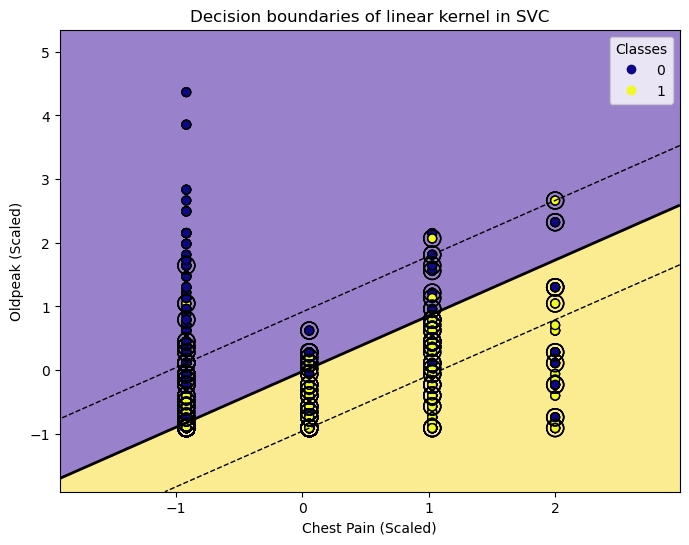

In [48]:
import matplotlib.pyplot as plt

# Plot ဆွဲခြင်း
plt.figure(figsize=(8, 6))

# နောက်ခံကို အရောင်ခြယ်ခြင်း (Decision Regions)
plt.contourf(xx, yy, Z, cmap='plasma', alpha=0.5)

# အလယ်မျဉ်း (Boundary) နဲ့  Margins မျဉ်းတွေကို ဆွဲခြင်း
P = model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contour(xx, yy, P, colors='black', levels=[-1, 0, 1], alpha=1.0,
            linestyles=['--', '-', '--'], linewidths=[1, 2, 1])

# လူနာတွေရဲ့ ဒေတာအစက်လေးတွေကို ချခြင်း
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_vis, s=40, 
                      cmap='plasma', edgecolors='k', label='Data Points')

# မျဉ်းကြောင်းကို အဓိက ထိန်းချုပ်နေတဲ့ Support Vectors အစက်တွေကို အဝိုင်းဝိုင်းပြခြင်း
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=150,
            linewidth=1, facecolors='none', edgecolors='black', label='Support Vectors')

# ဝင်ရိုးအမည်များနှင့် ခေါင်းစဉ်များ တပ်ခြင်း
plt.xlabel('Chest Pain (Scaled)')
plt.ylabel('Oldpeak (Scaled)')
plt.title('Decision boundaries of linear kernel in SVC')
plt.legend(*scatter.legend_elements(), title="Classes", loc="upper right")
plt.show()